In [19]:
import pandas as pd
import numpy as np

total_data = pd.read_csv('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/KNN-project/data/raw/diabetes.csv')

total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
total_data.shape

(768, 9)

In [21]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
# Replace zeros with NaN in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] using a for loop and replace with the mean of respective column
zeros_not_accepted = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for column in zeros_not_accepted:
    total_data[column].replace(0, np.nan, inplace=True)
    total_data[column].fillna(total_data[column].mean(), inplace=True)

# Check for null values
total_data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
# Split the dataset into features and target variable
from sklearn.model_selection import train_test_split

X = total_data.drop('Outcome', axis=1)
y = total_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,72.405184,29.15342,155.548223,32.457464,0.304,21
618,9,112.0,82.000000,24.00000,155.548223,28.200000,1.282,50
346,1,139.0,46.000000,19.00000,83.000000,28.700000,0.654,22
294,0,161.0,50.000000,29.15342,155.548223,21.900000,0.254,65
231,6,134.0,80.000000,37.00000,370.000000,46.200000,0.238,46


In [35]:
import math 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print('*'*50)
print(math.sqrt(len(y_train)))
print(math.sqrt(len(y_test)))
# 12 is even and We want odd numbers for K


(614, 8)
(154, 8)
(614,)
(154,)
**************************************************
24.779023386727733
12.409673645990857


In [29]:
# Feature Scaling: any algorithm that computes distance or assumes normality, scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Define the model and train it
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [37]:
# Predict the model
y_pred = model.predict(X_test)

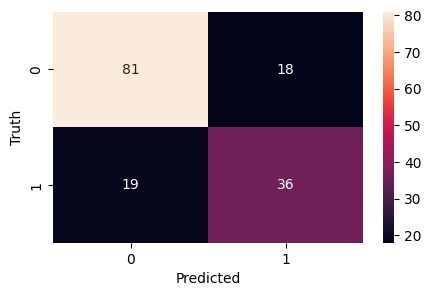

In [41]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix using matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [42]:
# From the confusion matrix we observe that the model is predicting well the negative class (0) but not the positive class (1) 
# Let's calculate the accuracy and f1-score
accuracy_f1 = f1_score(y_test, y_pred)
accuracy_f1

0.6605504587155964

In [55]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.97%


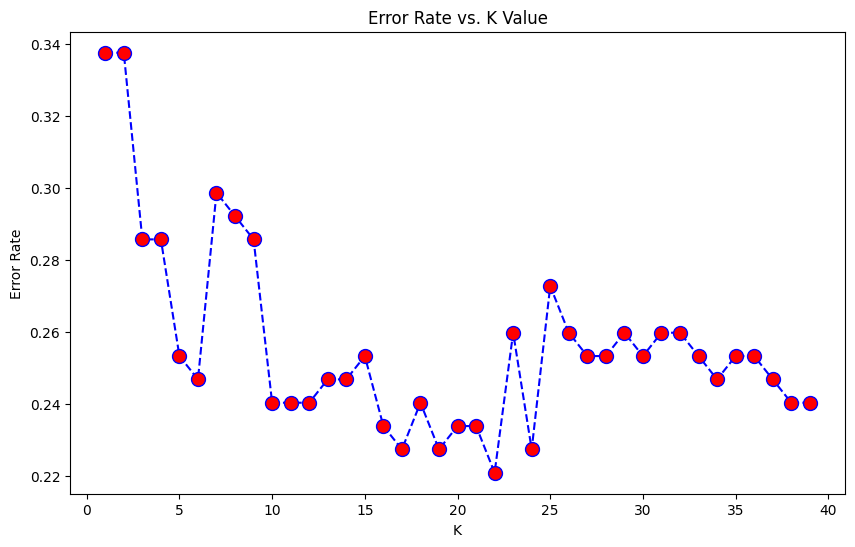

In [44]:
# Let's try to improve the model by finding the best K value
error_rate = []
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred_i = model.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

<div class="alert alert-block alert-success">
<b>Result:</b> From the plot we can see that the best K value is 11 because the error rate is the lowest at that point. We already used 11 as K value, so we don't need to change it. By using the default parameters, we obtain a 75.97% which. Let's see if we can improve it.
</div>

In [46]:
from pickle import dump
dump(model, open('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/KNN-project/models/knnclass_default_nneighb-11.pkl', 'wb'))
dump(model, open('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/KNN-project/models/knnclass_default_nneighb-11.sav', 'wb'))

In [51]:
# Let's try to find best params using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 40)}
model = KNeighborsClassifier()
model_cv = GridSearchCV(model, param_grid, cv=5)
model_cv.fit(X_train, y_train)

model_cv.best_params_
print(model_cv.best_params_)
model_cv.best_score_

{'n_neighbors': 27}


0.783379981340797

In [52]:
print("Accuracy: {:.2f}%".format(model_cv.best_score_*100))

Accuracy: 78.34%


In [56]:
dump(model_cv, open('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/KNN-project/models/knnclass_best_params.pkl', 'wb'))
dump(model_cv, open('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/KNN-project/models/knnclass_best_params.sav', 'wb'))

<div class="alert alert-block alert-success">
<b>Results:</b> After having used a GridSearchCV, we see the best n_neighbors is 27 and when applying we obtain a 78.34% which is a notable increase.
</div>